In [236]:
import json
from natasha import (
Segmenter,
MorphVocab,
NewsEmbedding,
NewsMorphTagger,
NewsSyntaxParser,
NewsNERTagger,
PER,
NamesExtractor,
Doc
)
from ipymarkup import show_dep_ascii_markup as show_markup


**Часть 2 - анализ текстовых данных**

In [237]:
with open('articles.json', encoding='utf-8') as file:
    file_content = file.read()
    data = json.loads(file_content)

print(data)

# В список titles запишем заголовки статей
titles = []
for article in data:
    titles.append(article['title'])

print(titles)
print(f'Количество заголовков: {len(titles)}')

[{'title': 'Биологи выяснили причину массовой гибели морских ежей в Красном море', 'body': 'В конце 2022 года ученые забили тревогу из-за неизвестной эпидемии, от которой гибнут морские ежи в заливе Акаба около израильского города Эйлат. Долгое время биологи не могли понять причину их вымирания. К счастью, исследователи Тель-Авивского университета выяснили, что смертельно повлияло на морских животных.  Израильские ученые в 2022 году заметили, что популяция черных морских ежей с длинными шипами вида Diadema setosum у берегов Эйлата резко и значительно снизилась. За полтора года биологи выяснили, что массовое вымирание произошло не только в заливе Акаба, но и в Красном море, а также достигло вод Индийского океана. По подсчетам авторов работы, в результате эпидемии в разных районах погибло от 88% до 100% особей вида Diadema setosum и их близких родственников из рода\xa0Echinothrix. Ученые проанализировали останки морских ежей, чтобы выяснить, что с ними случилось. Как показали результаты,

In [238]:
segmenter = Segmenter()
morph_vocab = MorphVocab()

emb = NewsEmbedding()
morph_tagger = NewsMorphTagger(emb)
syntax_parser = NewsSyntaxParser(emb)
ner_tagger = NewsNERTagger(emb)

names_extractor = NamesExtractor(morph_vocab)

1. **Токенезация и лемматизация**

In [239]:
for article in data:
    text = article.get('body')
    doc = Doc(text)
    doc.segment(segmenter)
    doc.parse_syntax(syntax_parser)
    doc.tag_morph(morph_tagger)
    
    for sentence in doc.sents: # получаем предложения
        sentence.syntax.print()

              ┌► В            case
          ┌►┌─└─ конце        obl
          │ │ ┌► 2022         amod
          │ └►└─ года         nmod
          │   ┌► ученые       nsubj
┌─┌─┌───┌─└─┌─└─ забили       
│ │ │   │   └──► тревогу      obj
│ │ │   │   ┌──► из-за        case
│ │ │   │   │ ┌► неизвестной  amod
│ │ │ ┌─└──►└─└─ эпидемии     obl
│ │ │ │   ┌────► ,            punct
│ │ │ │   │   ┌► от           case
│ │ │ │   │ ┌►└─ которой      obl
│ │ │ └──►└─└─── гибнут       acl:relcl
│ │ │     │   ┌► морские      amod
│ │ │     └──►└─ ежи          nsubj
│ │ │         ┌► в            case
│ │ └──────►┌─└─ заливе       obl
│ │         └──► Акаба        appos
│ │         ┌──► около        case
│ │         │ ┌► израильского amod
│ └────────►└─└─ города       obl
│           └──► Эйлат        appos
└──────────────► .            punct
      ┌► Долгое    amod
  ┌──►└─ время     obl
  │ ┌──► биологи   nsubj
  │ │ ┌► не        advmod
┌─└─└─└─ могли     
│   └►┌─ понять    xcomp
│   ┌─└► причину

Токенизация - разделение слов на предложения

In [240]:
for sentence in doc.sents:
    for token in sentence.tokens: # получаем токены
        print(token)

DocToken(stop=6, text='Ученые', id='1_1', head_id='1_7', rel='nsubj', pos='NOUN', feats=<Anim,Nom,Masc,Plur>)
DocToken(start=7, stop=18, text='лаборатории', id='1_2', head_id='1_1', rel='nmod', pos='NOUN', feats=<Inan,Gen,Fem,Sing>)
DocToken(start=19, stop=45, text='структурно-морфологических', id='1_3', head_id='1_4', rel='amod', pos='ADJ', feats=<Gen,Pos,Plur>)
DocToken(start=46, stop=58, text='исследований', id='1_4', head_id='1_2', rel='nmod', pos='NOUN', feats=<Inan,Gen,Neut,Plur>)
DocToken(start=59, stop=63, text='ИФХЭ', id='1_5', head_id='1_4', rel='nmod', pos='PROPN', feats=<Inan,Gen,Masc,Sing>)
DocToken(start=64, stop=67, text='РАН', id='1_6', head_id='1_5', rel='nmod', pos='PROPN', feats=<Inan,Gen,Fem,Sing>)
DocToken(start=68, stop=75, text='изучили', id='1_7', head_id='1_0', rel='root', pos='VERB', feats=<Perf,Ind,Plur,Past,Fin,Act>)
DocToken(start=76, stop=83, text='фазовые', id='1_8', head_id='1_9', rel='amod', pos='ADJ', feats=<Inan,Acc,Pos,Plur>)
DocToken(start=84, stop=

Лемматизация - перевод слов в начальную форму 

In [241]:
for sentence in doc.sents:
  for token in sentence.tokens:
      token.lemmatize(morph_vocab)
  lemmatized = {_.text: _.lemma for _ in sentence.tokens}
  print(lemmatized.items())

dict_items([('Ученые', 'ученый'), ('лаборатории', 'лаборатория'), ('структурно-морфологических', 'структурно-морфологический'), ('исследований', 'исследование'), ('ИФХЭ', 'ифхэ'), ('РАН', 'ран'), ('изучили', 'изучить'), ('фазовые', 'фазовый'), ('равновесия', 'равновесие'), (',', ','), ('взаимодиффузию', 'взаимодиффузия'), ('и', 'и'), ('структуру', 'структура'), ('неотвержденной', 'неотвержденной'), ('смеси', 'смесь'), ('из', 'из'), ('трех', 'три'), ('компонентов', 'компонент'), (':', ':'), ('эпоксидного', 'эпоксидный'), ('олигомера', 'олигомер'), ('активного', 'активный'), ('разбавителя', 'разбавитель'), ('алкилглицидилового', 'алкилглицидиловый'), ('эфира', 'эфир'), ('полисульфона', 'полисульфон'), ('(', '('), ('термопластичного', 'термопластичный'), ('полимера', 'полимер'), ('добавляемого', 'добавлять'), ('для', 'для'), ('увеличения', 'увеличение'), ('трещинностойкости', 'трещинностойкость'), ('системы', 'система'), (')', ')'), ('.', '.')])
dict_items([('Экспериментально', 'экспериме

2 **Посчитать наиболее встречающиеся пары подлежащих и сказуемых**

In [242]:
# Делим на подлежащие и сказуемые
nsubj = ''
root = ''
pairs = {}
for sentence in doc.sents:
  nsubj = ''
  root = ''
  for token in sentence.tokens:
    token.lemmatize(morph_vocab)

    if token.rel == "nsubj":
      nsubj = token.lemma
    if token.rel == 'root':
      root = token.lemma
    if nsubj and root:
      pairs[nsubj] = root

print(pairs)

{'ученый': 'выяснить', 'информация': 'необходимый', 'это': 'отразиться', 'олигомер': 'образоваться', 'структура': 'перестать', 'они': 'необходимый', 'смесь': 'возникать', 'компонент': 'выяснить', 'цвет': 'возникать', 'включение': 'присутствовать', 'один': 'являться', 'сотрудник': 'являться', 'краска': 'образовать', 'мы': 'смочь', 'форма': 'свидетельствовать', 'эксперимент': 'показать', 'эпоксид': 'показать', 'тот': 'показать', 'зона': 'смещаться', 'луч': 'создавать', 'скорость': 'параметр', 'секунда': 'требоваться', 'ульяна': 'смочь', 'шаг': 'мочь', 'смола': 'обладать', 'область': 'можно', 'изменение': 'развиваться', 'процесс': 'смещаться', 'итог': 'смочь', 'полимер': 'поддаваться', 'вещество': 'выделяться', 'способность': 'позволять', 'стойкость': 'использоваться', 'характеристика': 'недостаточно', 'добавление': 'повышать', 'недостаток': 'состоять', 'вязкость': 'состоять', 'перемешивание': 'состоять', 'разбавитель': 'добавляться', 'система': 'создавать'}


In [243]:
all_pairs = []
for article in data:
  doc = Doc(str(article))
  doc.segment(segmenter)
  doc.parse_syntax(syntax_parser)
  doc.tag_morph(morph_tagger)
  for sentence in doc.sents:
    nsubj = ''
    root = ''
    for token in sentence.tokens:
      token.lemmatize(morph_vocab)

      if token.rel == "nsubj":
        nsubj = token.lemma
      if token.rel == 'root':
        root = token.lemma
      if nsubj and root:
        all_pairs.append((nsubj, root))

from collections import Counter


pairs_count = Counter(all_pairs)
pairs_count

Counter({('биолог', 'выяснить'): 31,
         ('ученый', 'выяснить'): 4,
         ('ученый', 'забить'): 10,
         ('еж', 'забить'): 9,
         ('биолог', 'мочь'): 6,
         ('исследователь', 'выяснить'): 12,
         ('ученый', 'заметить'): 3,
         ('популяция', 'заметить'): 18,
         ('вымирание', 'выяснить'): 21,
         ('ученый', 'проанализировать'): 8,
         ('что', 'проанализировать'): 5,
         ('обитатель', 'подвергнуться'): 11,
         ('обитатель', 'оставаться'): 3,
         ('исследователь', 'обнаружить'): 8,
         ('некроз', 'обнаружить'): 3,
         ('это', 'обнаружить'): 10,
         ('доктор', 'руководить'): 12,
         ('инфузория', 'выяснить'): 5,
         ('одноклеточный', 'вызывать'): 17,
         ('патоген', 'переноситься'): 17,
         ('еж', 'переноситься'): 22,
         ('еж', 'инфицировать'): 2,
         ('они', 'погибнуть'): 5,
         ('микроорганизм', 'погибнуть'): 9,
         ('\\', 'погибнуть'): 12,
         ('группа', 'погибнуть'

In [244]:
pairs_count.most_common(10)

[(('это', 'позволить'), 127),
 (('нейробиолог', 'рассказать'), 83),
 (('они', 'важный'), 76),
 (('ученый', 'надеяться'), 70),
 (('результат', 'помочь'), 68),
 (('убеждение', 'предположить'), 66),
 (('ребенок', 'мочь'), 61),
 (('ученый', 'сделать'), 56),
 (('они', 'полезный'), 53),
 (('это', 'мочь'), 52)]

В гонке за первое место торжественно награждается пара 'это' : 'позволить' \
Поздравляем победителя с почетным первым местом 
🥳🥳🥳

3 **Посчитать самые популлярные слова (исключая стоп-слова, словарь стоп слов можно найти в nltk, либо отбросить по частям речи)**

In [245]:
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
stop_words = set(stopwords.words('russian'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\vadik\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [246]:
filtered = []
punct = ['\'', '#', '[', '{', ']', '(', ')', ',', '.', '?', '!', '«', '»', '—', '"', ':', ';', '-', '–', '\\', '1', '2', '3', '4', '5', '6', '7', '9', '0']
for article in data:
  doc = Doc(str(article))
  doc.segment(segmenter)
  doc.parse_syntax(syntax_parser)
  doc.tag_morph(morph_tagger)
  for sentence in doc.sents:
    for token in sentence.tokens:
      token.lemmatize(morph_vocab)
      if token.lemma not in stop_words and token.lemma not in punct:
        filtered.append(token.lemma)

words_count = Counter(filtered)
words_count.most_common(50)

[('который', 79),
 ('это', 78),
 ('ученый', 61),
 ('мочь', 61),
 ('человек', 54),
 ('исследование', 47),
 ('xa', 46),
 ('год', 37),
 ('работа', 35),
 ('автор', 28),
 ('исследователь', 27),
 ('планета', 27),
 ('также', 25),
 ('помощь', 25),
 ('время', 24),
 ('система', 24),
 ('свой', 23),
 ('мир', 23),
 ('морской', 22),
 ('например', 21),
 ('title', 20),
 ('body', 20),
 ('вода', 20),
 ('результат', 20),
 ('наш', 20),
 ('жизнь', 20),
 ('category', 20),
 ('comments', 20),
 ('created_date', 20),
 ('index_importance', 20),
 ('views', 20),
 ('}', 20),
 ('галактика', 19),
 ('получить', 19),
 ('структура', 19),
 ('высокий', 19),
 ('развитие', 18),
 ('еж', 17),
 ('случай', 17),
 ('находиться', 17),
 ('экзопланета', 17),
 ('университет', 16),
 ('разный', 16),
 ('заболевание', 16),
 ('весь', 16),
 ('новый', 16),
 ('число', 16),
 ('мозг', 16),
 ('связь', 16),
 ('неандерталец', 16)]

4 **Вывести статистику (по убыванию, наиболее встречающеся пары и самые популярные слова за исключением стоп-слов)**

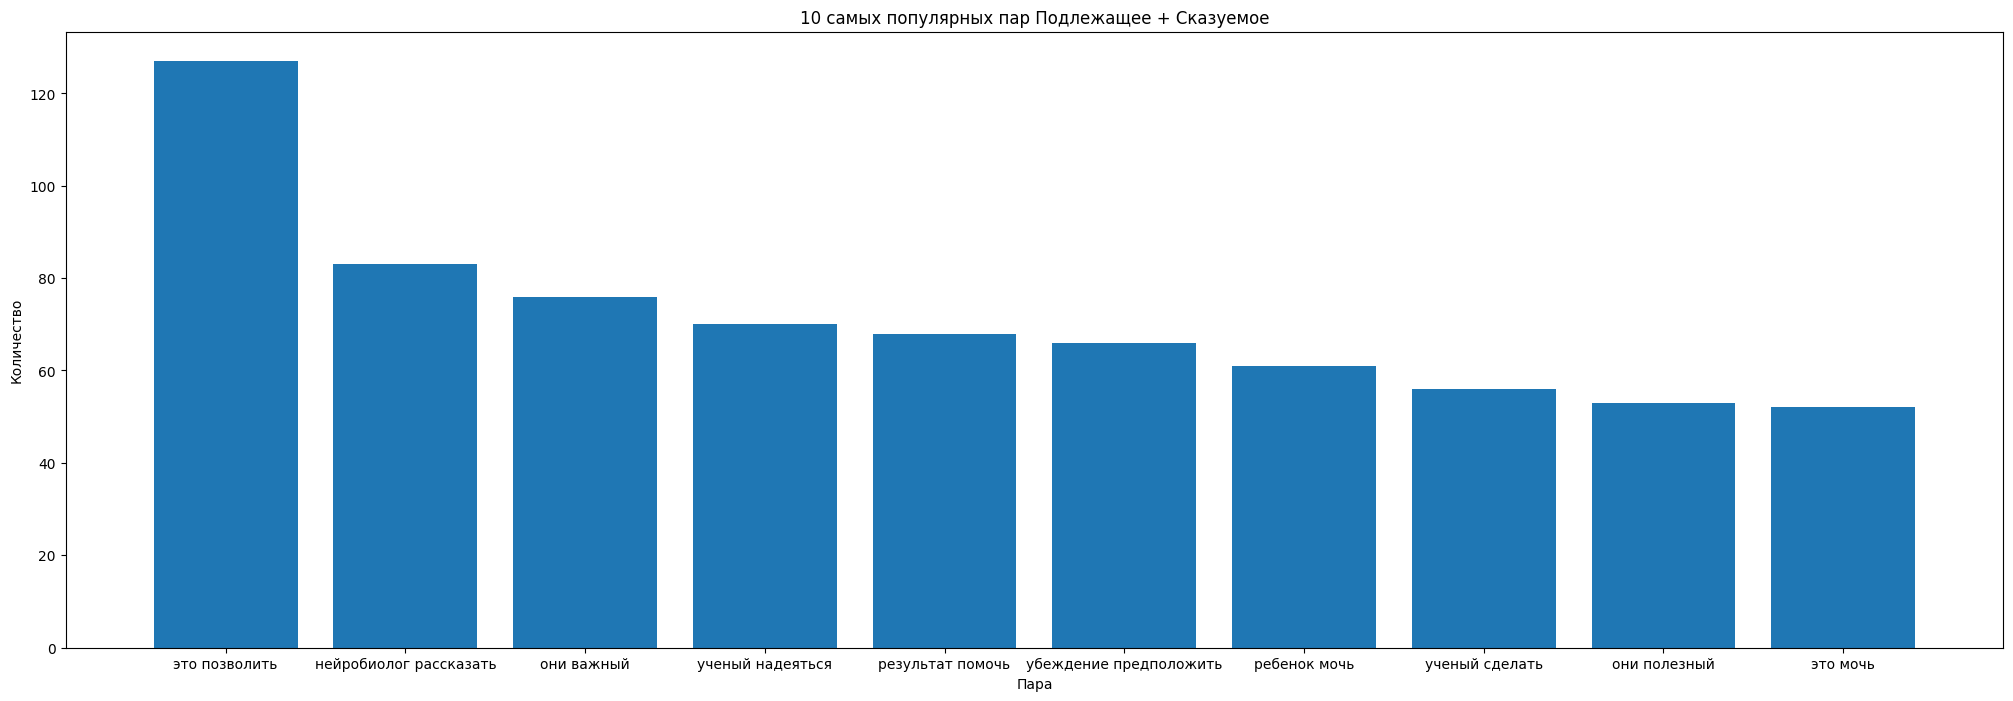

In [247]:
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import DataFrame
data = DataFrame()
pair = [(i[0][0] + ' ' + i[0][1]) for i in pairs_count.most_common(10)]
count = [i[1] for i in pairs_count.most_common(10)]

data["Pair"] = pair
data["Count"] = count
fig, ax = plt.subplots(figsize=(25, 8))

plt.bar(data["Pair"], data["Count"])
plt.title("10 самых популярных пар Подлежащее + Сказуемое")
plt.ylabel("Количество")
plt.xlabel("Пара")
plt.show()

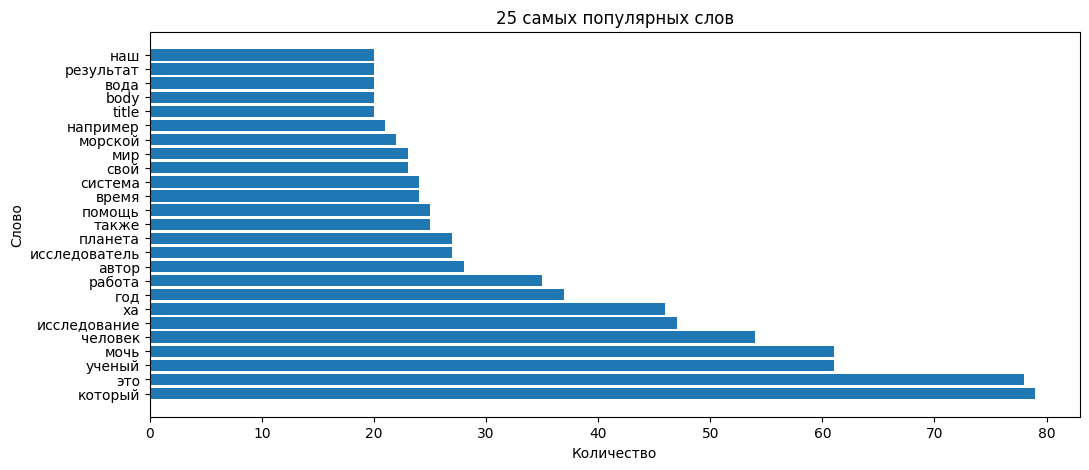

In [249]:
data = DataFrame()
word = [i[0] for i in words_count.most_common(25)]
count = [i[1] for i in words_count.most_common(25)]

data["Word"] = word
data["Count"] = count
fig, ax = plt.subplots(figsize=(12, 5))

plt.barh(data["Word"], data["Count"])
plt.title("25 самых популярных слов")
plt.ylabel("Слово")
plt.xlabel("Количество")
plt.show()